In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_data = pd.read_csv('/home/kirin/Documents/MLOPsProjects/MLOPs_project/data/train.csv')
test_data = pd.read_csv('/home/kirin/Documents/MLOPsProjects/MLOPs_project/data/test.csv')

EDA of the dataset

In [3]:
train_data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
size = train_data.shape[0]
size

193573

In [5]:
sample_data = train_data.sample(100)

In [6]:
train_data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
train_data.shape

(193573, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
train_data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [10]:
sample_data.drop(labels=['id'],axis=1, inplace=True)

In [11]:
sample_data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
169738,2.05,Ideal,I,SI2,62.2,55.0,8.12,8.17,5.07,16316
51618,1.59,Premium,H,SI1,60.4,58.0,7.59,7.56,4.56,9702


In [12]:
train_data.duplicated().sum()

0

In [13]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 169738 to 148613
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    100 non-null    float64
 1   cut      100 non-null    object 
 2   color    100 non-null    object 
 3   clarity  100 non-null    object 
 4   depth    100 non-null    float64
 5   table    100 non-null    float64
 6   x        100 non-null    float64
 7   y        100 non-null    float64
 8   z        100 non-null    float64
 9   price    100 non-null    int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 8.6+ KB


In [14]:
cat_col = sample_data.columns[sample_data.dtypes == 'object']

In [15]:
num_col = sample_data.columns[sample_data.dtypes != 'object']

In [16]:
sample_data[cat_col]

,cut,color,clarity
169738,Ideal,I,SI2
51618,Premium,H,SI1
155568,Ideal,G,SI1
121261,Ideal,H,VS2
88301,Very Good,E,VS2
...,...,...,...
16354,Ideal,F,SI2
121809,Premium,D,VVS2
9289,Premium,E,SI2
55552,Premium,E,VS2


In [17]:
for col in cat_col:
    print(sample_data[col].value_counts())
    print(f'Total count: {len(sample_data[col].value_counts())}')
    print("=============================================")

Ideal        52
Premium      25
Very Good    17
Good          4
Fair          2
Name: cut, dtype: int64
Total count: 5
H    23
G    20
E    17
F    14
D    12
I     9
J     5
Name: color, dtype: int64
Total count: 7
VS2     32
SI1     23
SI2     15
VVS2    10
VS1      9
VVS1     6
IF       4
I1       1
Name: clarity, dtype: int64
Total count: 8


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

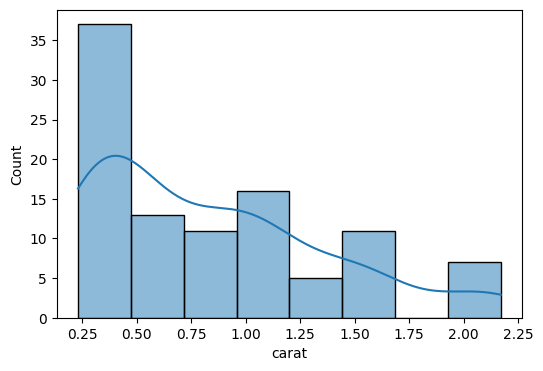

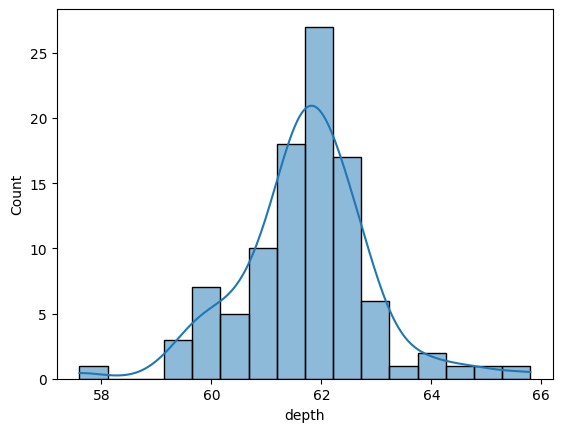

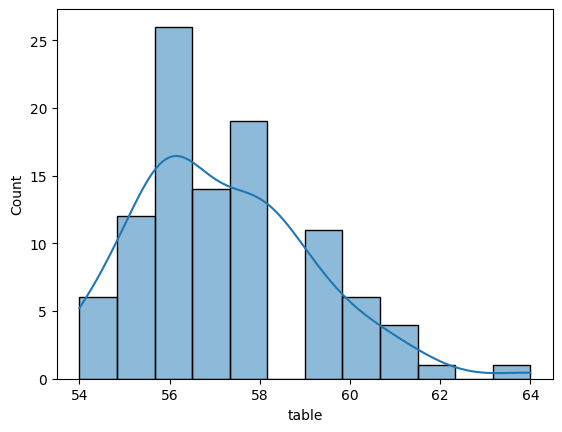

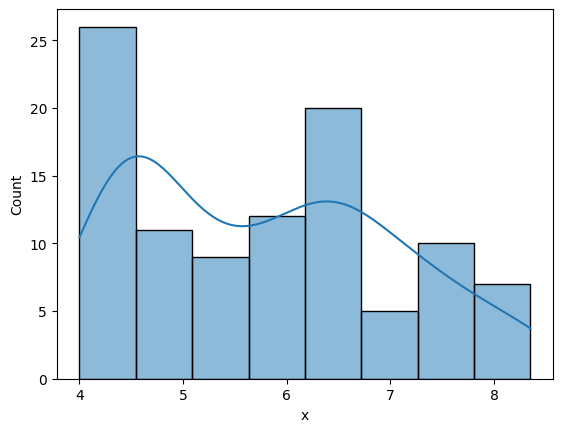

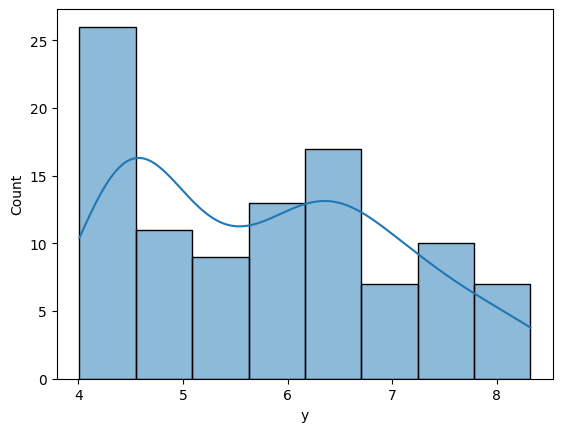

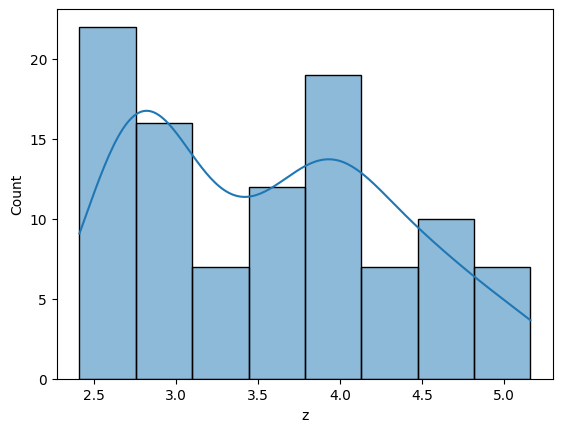

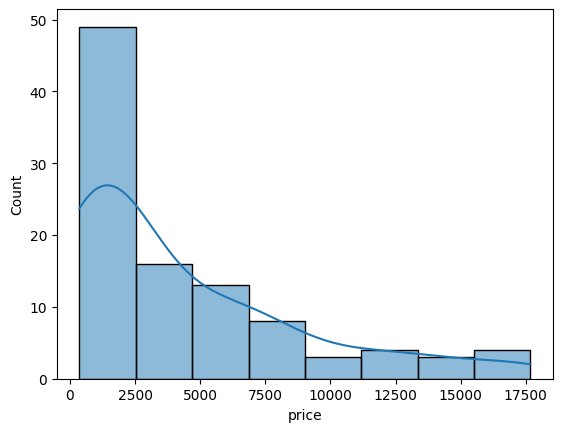

In [19]:
def printgraph(data,num_col):
    plt.figure(figsize=(6, 4))

    for col in num_col:
        sns.histplot(data=data, x=col, kde=True)
        print("\n")
        plt.show()
        
printgraph(sample_data,num_col)

In [20]:
def heatmap(data, col):
    sns.heatmap(data[col].corr(), annot=True, cmap="YlGnBu", cbar=False, fmt=".3f", linewidths=.5, annot_kws={"size": 10}, xticklabels=num_col, yticklabels=num_col)

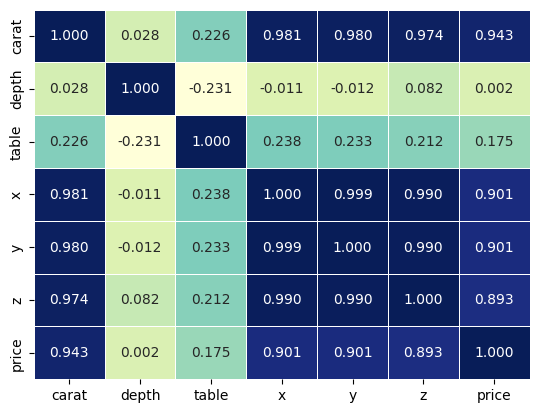

In [21]:
heatmap(train_data, num_col)

In [22]:
cat_col_values_list = []
for i in cat_col:
    print(train_data[i].unique().tolist())
    unique_values = train_data[i].unique().tolist()
    cat_col_values_list.append([[value] for value in unique_values])

cat_col_values_list

['Premium', 'Very Good', 'Ideal', 'Good', 'Fair']
['F', 'J', 'G', 'E', 'D', 'H', 'I']
['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1']


[[['Premium'], ['Very Good'], ['Ideal'], ['Good'], ['Fair']],
 [['F'], ['J'], ['G'], ['E'], ['D'], ['H'], ['I']],
 [['VS2'], ['SI2'], ['VS1'], ['SI1'], ['IF'], ['VVS2'], ['VVS1'], ['I1']]]

In [23]:
def ordinalEncoding(cat_col):
    encoder = OrdinalEncoder(encoded_missing_value=-2)
    result = encoder.fit_transform([[category[0]] for category in cat_col])
    result = result + 1
    return result
    sorted_categories = sorted(category[0] for category in cat_col)
    return {category: [i+1] for i, category in enumerate(sorted_categories)}
    

In [24]:
cut_map = ordinalEncoding(cat_col_values_list[0])
print(cut_map)
print(cat_col_values_list[0])
# cut_map.sort()

[[4.]
 [5.]
 [3.]
 [2.]
 [1.]]
[['Premium'], ['Very Good'], ['Ideal'], ['Good'], ['Fair']]


In [25]:
cut_map = ordinalEncoding(cat_col_values_list[0])
clarity_map = ordinalEncoding(cat_col_values_list[2])
color_map = ordinalEncoding(cat_col_values_list[1])

In [26]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [27]:
sample_data["cut"]=sample_data["cut"].map(cut_map)
sample_data["clarity"]=sample_data["clarity"].map(clarity_map)
sample_data["color"]=sample_data["color"].map(color_map)

In [28]:
sample_data

,carat,cut,color,clarity,depth,table,x,y,z,price
169738,2.05,5,6,2,62.2,55.0,8.12,8.17,5.07,16316
51618,1.59,4,5,3,60.4,58.0,7.59,7.56,4.56,9702
155568,0.72,5,4,3,62.1,56.0,5.74,5.77,3.57,2288
121261,0.51,5,5,4,61.8,54.0,5.16,5.19,3.20,1437
88301,0.72,3,2,4,62.7,58.0,5.71,5.72,3.57,3004
...,...,...,...,...,...,...,...,...,...,...
16354,0.33,5,3,2,61.7,56.0,4.46,4.42,2.74,569
121809,1.01,4,1,6,62.4,59.0,6.34,6.37,3.96,12539
9289,1.40,4,2,2,62.4,57.0,7.17,7.12,4.45,6147
55552,0.36,4,2,4,60.1,59.0,4.58,4.62,2.76,789


DATA PREPROCESSING

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [30]:
x_data = train_data.drop(columns=['id','price'], axis=1)
y_data = train_data['price']

In [31]:
x_data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05


In [32]:
cat_col = x_data.select_dtypes(include=['object']).columns
num_col = x_data.select_dtypes(exclude=['object']).columns

In [33]:
# cut_categories = train_data['cut'].unique()
# color_categories = train_data['color'].unique()
# clarity_categories = train_data['clarity'].unique() 

In [34]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ["D", "E", "F", "G", "H", "I", "J"]
clarity_categories = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

In [35]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler(with_mean=False))
    ]
)
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)


In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [38]:
preprocessor.fit_transform(x_train)

array([[ 0.69046939, 56.98459596, 30.22632277, ...,  3.        ,
         1.        ,  2.        ],
       [ 2.58926021, 57.90967057, 29.70517927, ...,  3.        ,
         2.        ,  3.        ],
       [ 3.23657527, 57.53964073, 28.66289228, ...,  4.        ,
         5.        ,  3.        ],
       ...,
       [ 2.63241455, 58.09468549, 30.22632277, ...,  3.        ,
         3.        ,  3.        ],
       [ 0.66889222, 56.52205866, 29.18403578, ...,  2.        ,
         3.        ,  6.        ],
       [ 0.66889222, 57.16961088, 30.74746627, ...,  2.        ,
         3.        ,  1.        ]])

In [39]:
x_train.shape

(154858, 9)

In [40]:
x_test.shape

(38715, 9)

In [41]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [42]:
x_train

,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut,cat__color,cat__clarity
0,0.690469,56.984596,30.226323,3.943170,3.995681,3.924673,3.0,1.0,2.0
1,2.589260,57.909671,29.705179,6.130819,6.124899,6.154931,3.0,2.0,3.0
2,3.236575,57.539641,28.662892,6.571950,6.577924,6.560432,4.0,5.0,3.0
3,3.603387,57.262118,30.747466,6.887043,6.895041,6.821111,3.0,5.0,1.0
4,2.157717,58.927253,31.268610,5.707693,5.708116,5.821840,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
154853,1.078858,55.689492,31.789753,4.600365,4.666158,4.474997,2.0,1.0,2.0
154854,4.121239,57.632148,32.310897,7.067097,7.058130,7.052826,2.0,2.0,2.0
154855,2.632415,58.094685,30.226323,6.139822,6.106778,6.169413,3.0,3.0,3.0
154856,0.668892,56.522059,29.184036,3.934167,3.986620,3.866745,2.0,3.0,6.0


In [43]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [44]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'xgboost': XGBRegressor(),
}

In [45]:
train_model_list = []
model_list = []
r2_list = []

In [46]:
list(models)

['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'xgboost']

In [47]:
def evaluate_model(true, pred):
    r2, mse, mae = r2_score(true, pred), mean_squared_error(true, pred), mean_absolute_error(true, pred)
    return mse, mae, r2

In [52]:
models_list = list(models.values())
for model in list(models_list):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse, mae, r2 = evaluate_model(y_test, y_pred)
    
    print(f"Model training performnace: {model}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    r2_list.append(r2)
    
    print("="*40)
    print("\n")

Model training performnace: LinearRegression()
MSE: 1013245.5453
MAE: 671.5856
R2 Score: 0.9373


Model training performnace: Ridge()
MSE: 1013256.1247
MAE: 671.6146
R2 Score: 0.9373


Model training performnace: Lasso()
MSE: 1013790.3860
MAE: 672.9964
R2 Score: 0.9373


Model training performnace: RandomForestRegressor()
MSE: 369693.6413
MAE: 309.6638
R2 Score: 0.9771


Model training performnace: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monot

In [53]:
r2_list

[0.9372975155452953,
 0.9372968608621601,
 0.9372637992681518,
 0.9372975155452953,
 0.9372968608621601,
 0.9372637992681518,
 0.9372975155452953,
 0.9372968608621601,
 0.9372637992681518,
 0.9372975155452953,
 0.9372968608621601,
 0.9372637992681518,
 0.9372975155452953,
 0.9372968608621601,
 0.9372637992681518,
 0.9771223175811156,
 0.9787904620170593]

In [54]:
max(r2_list)

0.9787904620170593